In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

[[161 161 163 ... 135 135 135]
 [161 162 163 ... 133 132 131]
 [162 163 164 ... 130 129 127]
 ...
 [171 172 174 ...  27  28  31]
 [169 172 177 ...  27  28  31]
 [134 140 146 ...  27  28  28]]


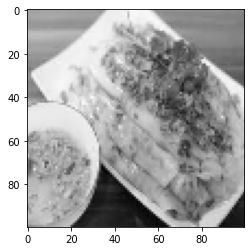

In [ ]:
datadir = "/content/drive/MyDrive/AI/MonAn"
categories=['banhcuon','banhkhot','banhmi','banhxeo','bunbohue','buncha','bunrieucua','comtam','goicuon','pho']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
#creating training data
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 10/10 [00:02<00:00,  4.02it/s]

100


In [ ]:
#saving (x:picture), (y:label)
X=[]
y=[]
for features, label in training_data :
  X.append(features)
  y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('X',X.shape)
print('y',y.shape)

X (100, 100, 100, 1)
y (100,)


In [ ]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/AI/MonAn/save/X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/AI/MonAn/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
pickle_in = open("/content/drive/MyDrive/AI/MonAn/save/X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/AI/MonAn/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (100, 100, 100, 1)
y (100,)


In [ ]:
y= to_categorical(y,11)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=30,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/30
2/2 [==============================] - 10s 3s/step - loss: 4.7417 - accuracy: 0.1000 - val_loss: 3.5623 - val_accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 10s 3s/step - loss: 4.8605 - accuracy: 0.1222 - val_loss: 2.6148 - val_accuracy: 0.0000e+00
Epoch 3/30
2/2 [==============================] - 11s 3s/step - loss: 2.4604 - accuracy: 0.1111 - val_loss: 3.0674 - val_accuracy: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 6s 2s/step - loss: 2.2884 - accuracy: 0.1111 - val_loss: 3.5752 - val_accuracy: 0.0000e+00
Epoch 5/30
2/2 [==============================] - 8s 3s/step - loss: 2.2327 - accuracy: 0.1111 - val_loss: 4.1218 - val_accuracy: 0.0000e+00
Epoch 6/30
2/2 [==============================] - 7s 2s/step - loss: 2.2119 - accuracy: 0.2000 - val_loss: 4.9338 - val_accuracy: 0.0000e+00
Epoch 7/30
2/2 [==============================] - 7s 2s/step - loss: 2.0696 - accuracy: 0.1778 - val_loss: 5.6192 - val_accuracy: 0.0000e+00
Epoch 8/30

In [ ]:
model.save('MonAn.h5')

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation banhkhot


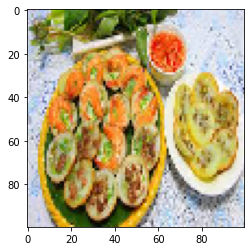

In [ ]:
labels = {0: 'banhcuon',
          1: 'banhkhot',
          2: 'banhmi',
          3: 'banhxeo',
          4: 'bunbohue',
          5: 'buncha',
          6: 'bunrieucua',
          7: 'comtam',
          8: 'goicuon',
          9: 'pho',          
          }
model = load_model('MonAn.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI/MonAn/banhkhot/9.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
expectation bunbohue


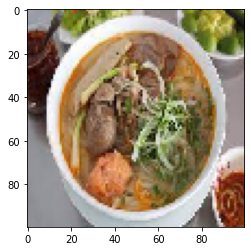

In [ ]:
model = load_model('MonAn.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI/MonAn/bunbohue/9.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation banhmi


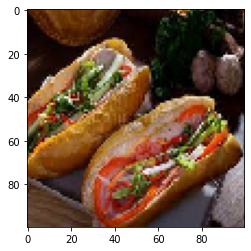

In [ ]:
model = load_model('MonAn.h5')
	# load model
img = load_image('/content/drive/MyDrive/AI/MonAn/banhmi/9.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('MonAn.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/MonAn.ipynb to pdf
[NbConvertApp] Support files will be in MonAn_files/
[NbConvertApp] Making directory ./MonAn_files
[NbConvertApp] Making directory ./MonAn_files
[NbConvertApp] Making directory ./MonAn_files
[NbConvertApp] Making directory ./MonAn_files
[NbConvertApp] Writing 51078 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 345617 bytes to /content/drive/My Drive/MonAn.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'